# EDA de los archivos

In [1]:
# Instalacion de paquetes
# %pip install seaborn
# %pip install matplot
# %pip install numpy
# %pip install pandas

In [2]:
# Carga de librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### EDA de tecnologias de internet por provincia
- Acceso a Internet fijo por tecnología y provincia
- Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

In [3]:
internet_tecno_prov = pd.read_csv("./ENACOM_data/internet_tecno_prov.csv")

if internet_tecno_prov.columns[0] == 'Unnamed: 0':
    internet_tecno_prov.drop(columns= 'Unnamed: 0', inplace= True)

In [4]:
internet_tecno_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [5]:
internet_tecno_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [6]:
internet_tecno_prov['Trimestre'].value_counts()

Trimestre
3                                                                                                                                     192
2                                                                                                                                     192
1                                                                                                                                     192
4                                                                                                                                     192
3 *                                                                                                                                    24
2 *                                                                                                                                    24
1 *                                                                                                                                    24
Los datos provinciales n

In [7]:
internet_tecno_prov['Año'].value_counts()

Año
2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2022      72
2019 *    72
2019      24
*          1
Name: count, dtype: int64

In [8]:
internet_tecno_prov[internet_tecno_prov['Año'] == '2019 *']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
288,2019 *,3 *,Buenos Aires,1.277.249,2.144.956,425.386,85.572,27.070,3.960.233
289,2019 *,3 *,Capital Federal,300.288,1.080.973,24.900,3.895,31.155,1.441.211
290,2019 *,3 *,Catamarca,24.349,5.543,13,244.000,2.251,32.400
291,2019 *,3 *,Chaco,50.416,49.156,8.063,5.224,1.592,114.451
292,2019 *,3 *,Chubut,37.298,27.090,1.917,15.149,7.551,89.005
...,...,...,...,...,...,...,...,...,...
355,2019 *,1 *,Santa Cruz,10.659,4.615,382,6.514,2.735,24.905
356,2019 *,1 *,Santa Fe,340.038,340.344,15.621,23.215,17.860,737.078
357,2019 *,1 *,Santiago Del Estero,25.337,61.547,23,2.847,99.000,89.853
358,2019 *,1 *,Tierra Del Fuego,19.789,23.549,1.623,0.000,1.486,46.447


In [9]:
internet_tecno_prov.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032
840,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Correccion de Año y Trimestre
reemplazo_info = {'1 *': '1',
                  '2 *': '2',
                  '3 *': '3'}

internet_tecno_prov['Año'].replace({'2019 *': '2019'}, inplace= True)
internet_tecno_prov['Trimestre'].replace(reemplazo_info, inplace= True)

# Eliminacion de ultima fila
internet_tecno_prov.drop(labels= 840, inplace= True)

In [11]:
# internet_tecno_prov['Fecha'] = pd.to_datetime(internet_tecno_prov['Año'].astype(str) + 'Q' + internet_tecno_prov['Trimestre'].astype(str))

In [12]:
# Correccion de formato de numeros del dataset
columnas_numerica = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

for col in columnas_numerica:
    internet_tecno_prov[col] = internet_tecno_prov[col].astype(str)
    internet_tecno_prov[col] = internet_tecno_prov[col].str.replace('.','')
    internet_tecno_prov[col] = internet_tecno_prov[col].astype(int)

type(internet_tecno_prov['ADSL'][0])

numpy.int64

In [13]:
internet_tecno_prov['Año'].value_counts()

Año
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2022    72
Name: count, dtype: int64

In [14]:
internet_tecno_prov[internet_tecno_prov['Año'] == '2022']['Trimestre'].value_counts()

Trimestre
3    24
2    24
1    24
Name: count, dtype: int64

# Creacion de un dataframe a partir de los datos de acceso provincial
- El numero de accesos por provincia y por cuatrimestre (Trimestre, segun el dataset), es un numero abstracto dificil de interpretar, en este caso voy a convertirlo en una tabla que me indique el crecimiento anual de cada provincia, de esta forma obtenemos un indicador mas claro del uso de las tecnologias en cada provincia

In [15]:
# Eliminacion del año 2022 porque cuenta con los 3 primeros cuatrimestres
filtro_drop_anio = internet_tecno_prov[internet_tecno_prov['Año'] == '2022'].index
internet_tecno_prov_crecimiento = internet_tecno_prov.drop(filtro_drop_anio)
internet_tecno_prov_crecimiento['Año'].value_counts()

Año
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64

In [16]:
internet_tecno_prov_crecimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 72 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           768 non-null    object
 1   Trimestre     768 non-null    object
 2   Provincia     768 non-null    object
 3   ADSL          768 non-null    int64 
 4   Cablemodem    768 non-null    int64 
 5   Fibra óptica  768 non-null    int64 
 6   Wireless      768 non-null    int64 
 7   Otros         768 non-null    int64 
 8   Total         768 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 54.1+ KB


In [17]:
internet_tecno_prov_crecimiento.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,7.680000e+02
mean,1.338011e+05,1.643313e+05,2.254115e+04,8893.588542,6254.526042,3.356109e+05
std,2.647537e+05,4.039153e+05,9.581925e+04,15812.754216,9546.239106,7.196497e+05
min,8.175000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000,1.255700e+04
25%,2.263600e+04,7.585750e+03,1.205000e+02,1023.000000,587.500000,5.165475e+04
50%,4.927000e+04,3.299350e+04,9.410000e+02,3936.500000,2584.500000,1.001490e+05
75%,1.086068e+05,6.589175e+04,9.678250e+03,10559.250000,7237.500000,1.711405e+05
max,1.586343e+06,2.706506e+06,1.176024e+06,126887.000000,73415.000000,4.509157e+06


In [18]:
# Creacion de un nuevo df eliminando la columna trimestre y sumando todos los 
# valores de los cuatrimestres para cada provincia
crecimiento_provincias = pd.DataFrame()

for año in range(2014, 2022):
    crecimiento_temp = internet_tecno_prov_crecimiento[internet_tecno_prov_crecimiento['Año'] == str(año)]
    crecimiento_temp.drop(columns= ['Año', 'Trimestre'], inplace= True)
    resultado = crecimiento_temp.groupby('Provincia').sum().reset_index()
    resultado['Año'] = str(año)
    crecimiento_provincias = pd.concat([crecimiento_provincias, resultado], axis= 0)

crecimiento_provincias.head()

,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Año
0,Buenos Aires,6275077,4207132,485970,56007,130890,11170394,2014
1,Capital Federal,1799146,3322198,70537,7706,58891,5258478,2014
2,Catamarca,98078,774,65,0,1770,99094,2014
3,Chaco,214637,40621,120,10,2370,255616,2014
4,Chubut,199894,2553,3505,35981,26622,278419,2014


In [19]:
# Para tener una mejor representacion voy a igualar a 0 los valores menores a 1000 accesos, 
# ya que al dejarlos generarian porcentajes muy elevados que no brindarian una relevante 
# y se comportarian como outlayer

crecimiento_provincias.loc[(crecimiento_provincias['ADSL'] < 1000) & (crecimiento_provincias['ADSL'] != 0), 'ADSL'] = 0
crecimiento_provincias.loc[(crecimiento_provincias['Cablemodem'] < 1000) & (crecimiento_provincias['Cablemodem'] != 0), 'Cablemodem'] = 0
crecimiento_provincias.loc[(crecimiento_provincias['Fibra óptica'] < 1000) & (crecimiento_provincias['Fibra óptica'] != 0), 'Fibra óptica'] = 0
crecimiento_provincias.loc[(crecimiento_provincias['Wireless'] < 1000) & (crecimiento_provincias['Wireless'] != 0), 'Wireless'] = 0
crecimiento_provincias.loc[(crecimiento_provincias['Otros'] < 1000) & (crecimiento_provincias['Otros'] != 0), 'Otros'] = 0

In [20]:
# Creacion del nuevo dataframe de crecimiento porcentual, se compara un año con respecto al anterior
crecimiento_provincias_porcentual = pd.DataFrame()
#anios = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

for anio in range(2014, 2021):
    df_anterior = crecimiento_provincias[crecimiento_provincias['Año'] == str(anio)]#.reset_index()
    df_presente = crecimiento_provincias[crecimiento_provincias['Año'] == str(anio + 1)]#.reset_index()

    df_resultado_armado = df_presente[['Año', 'Provincia']]

    df_anterior.drop(columns= ['Año', 'Provincia'], inplace= True)
    df_presente.drop(columns= ['Año', 'Provincia'], inplace= True)

    df_resultado = ((df_presente - df_anterior) / df_anterior) * 100    # Formula de crecimiento
    df_resultado = df_resultado.round(2)                                # Redondeo para que sea mas legible
    
    # La division por cero arroja infinito y la division de 0/0 un NaN, 
    # son reemplazados por 0 para entender mejor los graficos, un 0 en el año que figura indica 
    # que no tuvo la tecnolofgia el año anterior y se implementa en durante el año en curso
    df_resultado.replace(np.inf, 0, inplace= True)  
    df_resultado.fillna(0, inplace= True)
    df_resultado.drop(columns= 'Total', inplace= True)      #Para computar correctamente se elimina y calcula de nuevo
    df_resultado['Total'] = df_resultado.sum(axis= 1)

    df_resultado_armado = pd.concat([df_resultado_armado, df_resultado], axis= 1)

    crecimiento_provincias_porcentual = pd.concat([crecimiento_provincias_porcentual, df_resultado_armado], axis= 0)

crecimiento_provincias_porcentual.head()

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2015,Buenos Aires,0.98,10.42,-3.97,40.00,-56.38,-8.95
1,2015,Capital Federal,1.07,3.89,27.47,12.48,-9.89,35.02
2,2015,Catamarca,4.41,0.00,0.00,0.00,-19.21,-14.80
3,2015,Chaco,4.28,176.30,0.00,0.00,-24.47,156.11
4,2015,Chubut,-11.19,20.72,4.25,14.61,-25.35,3.04


In [21]:
grafico = crecimiento_provincias_porcentual.copy()

grafico['Año'] = pd.to_numeric(grafico['Año'])

grafico_15_18 = grafico[grafico['Año'] <= 2018]
grafico_19_21 = grafico[grafico['Año'] > 2018]


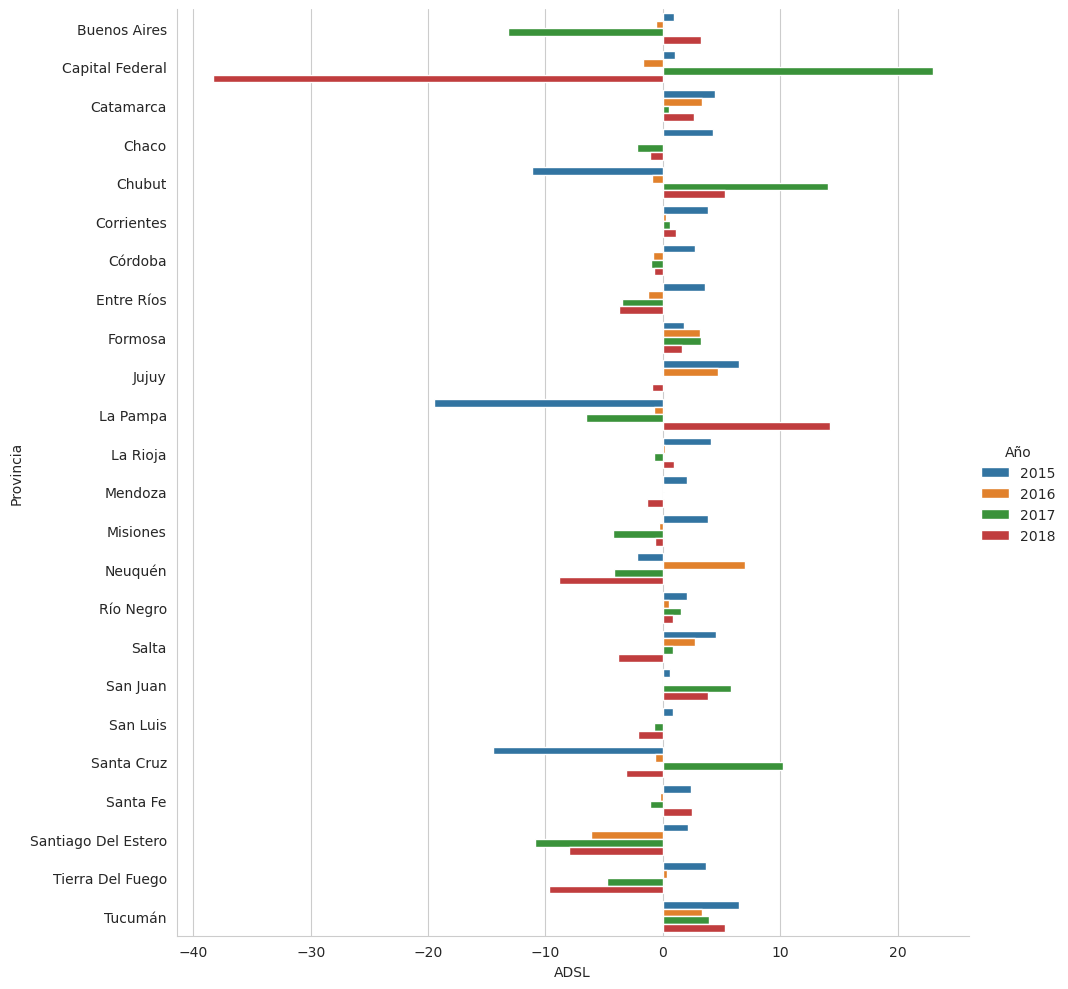

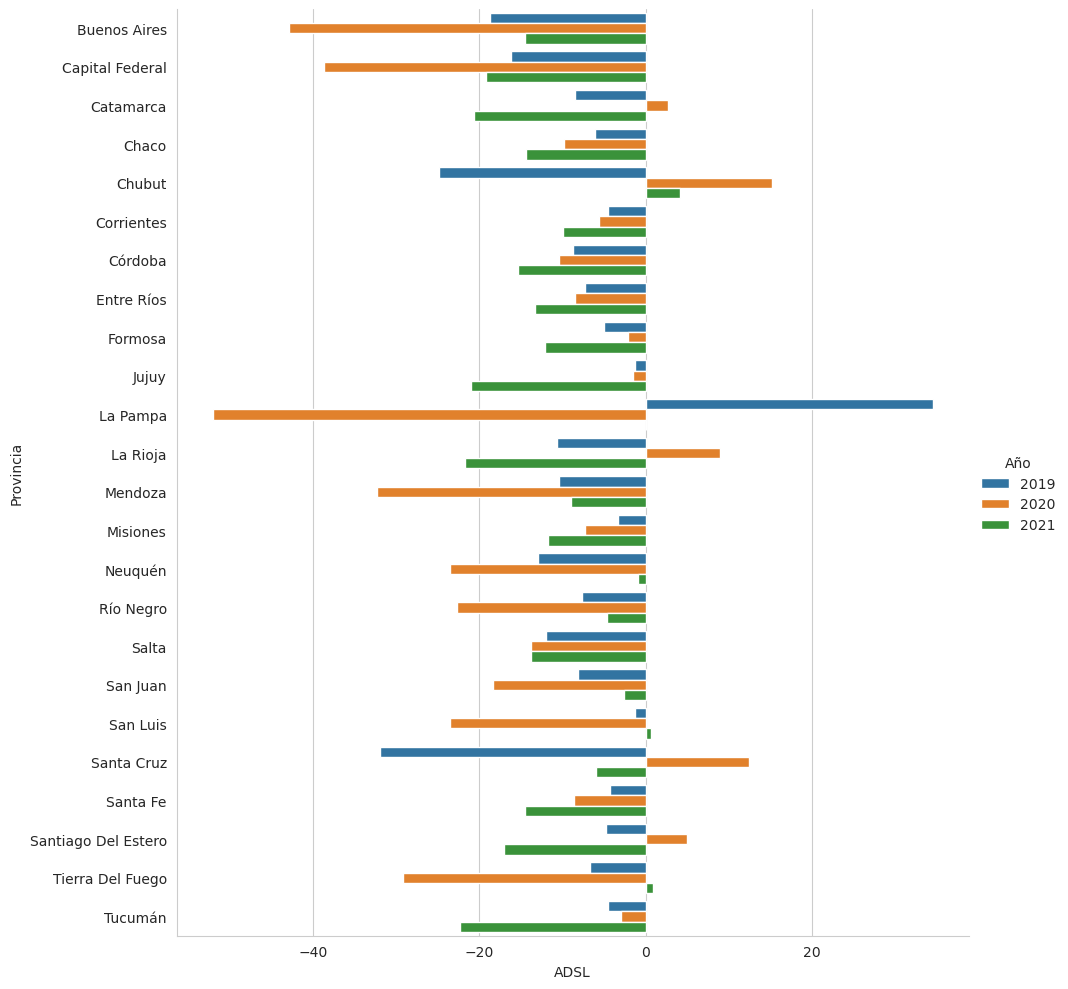

In [22]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'ADSL', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'ADSL', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

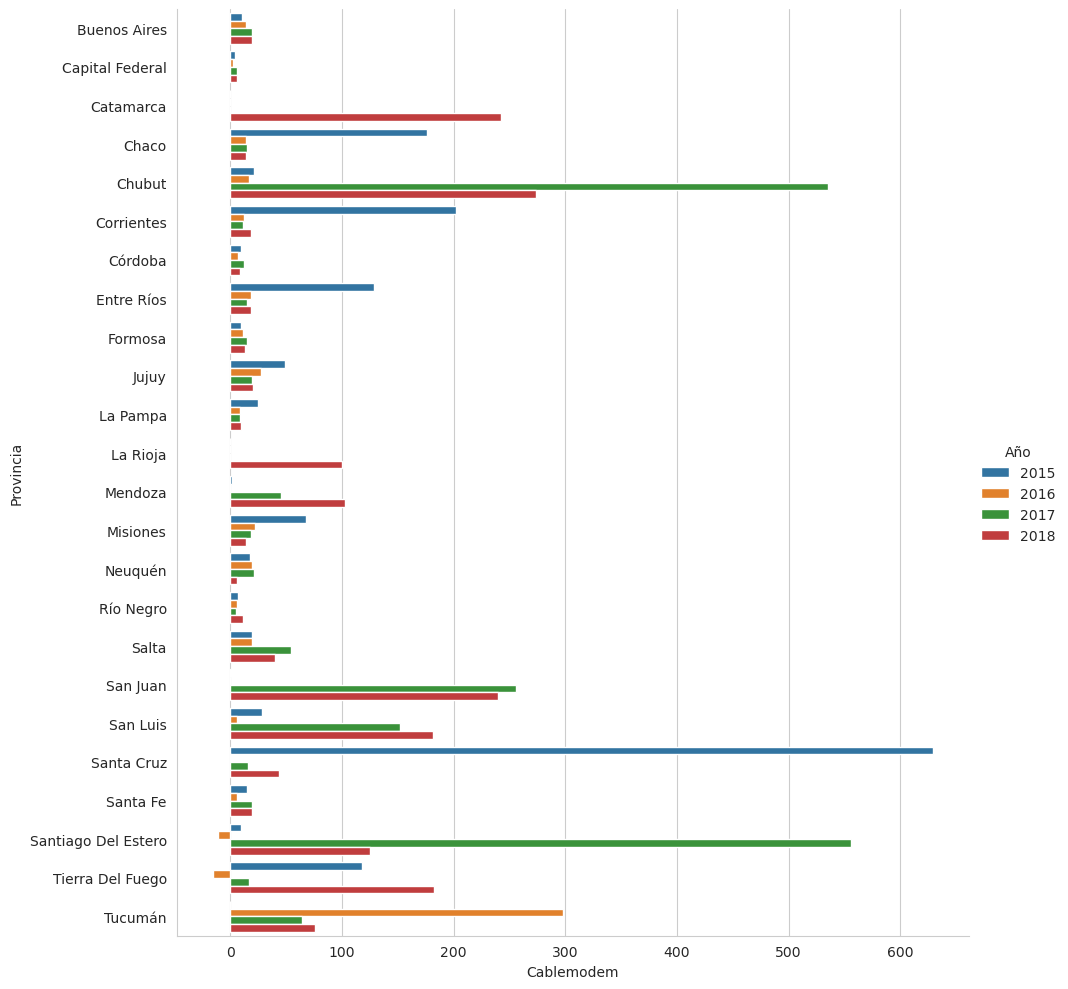

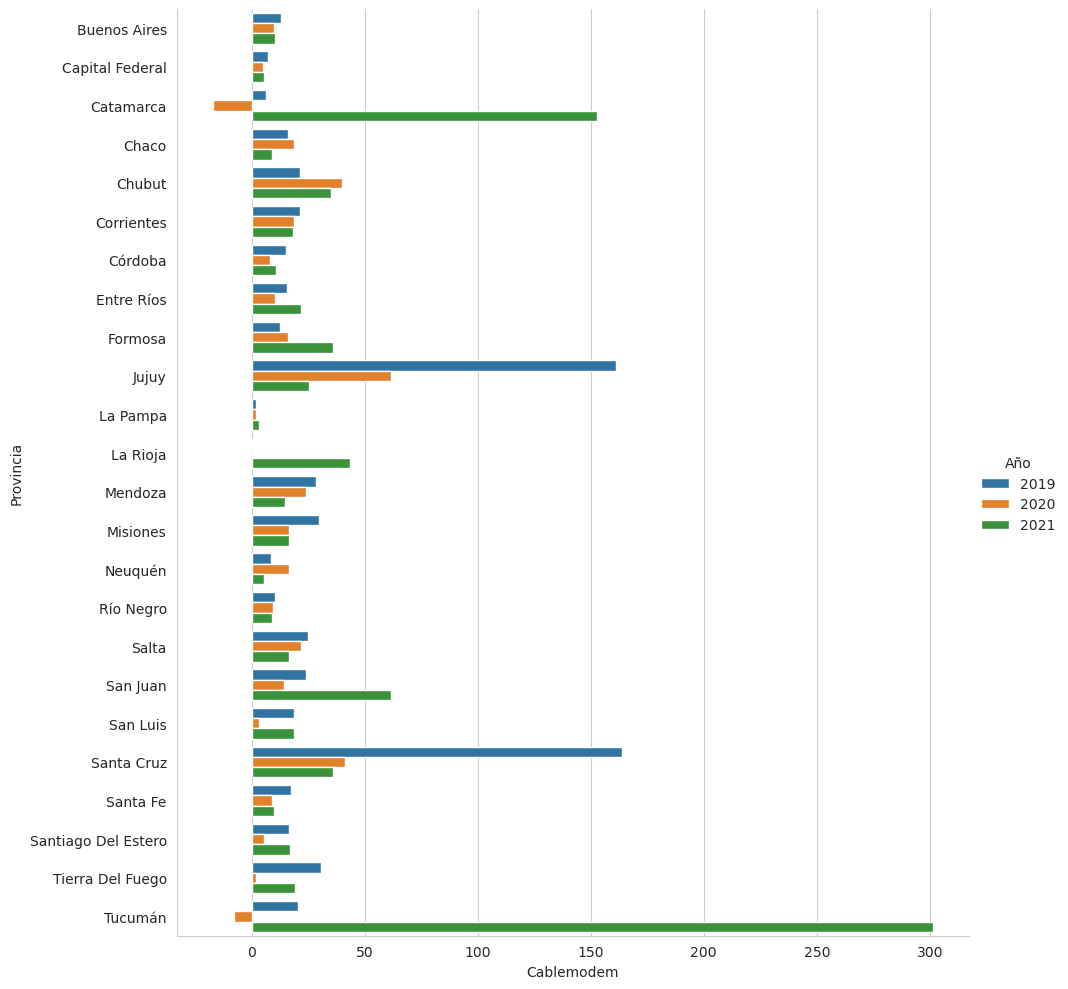

In [23]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'Cablemodem', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'Cablemodem', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

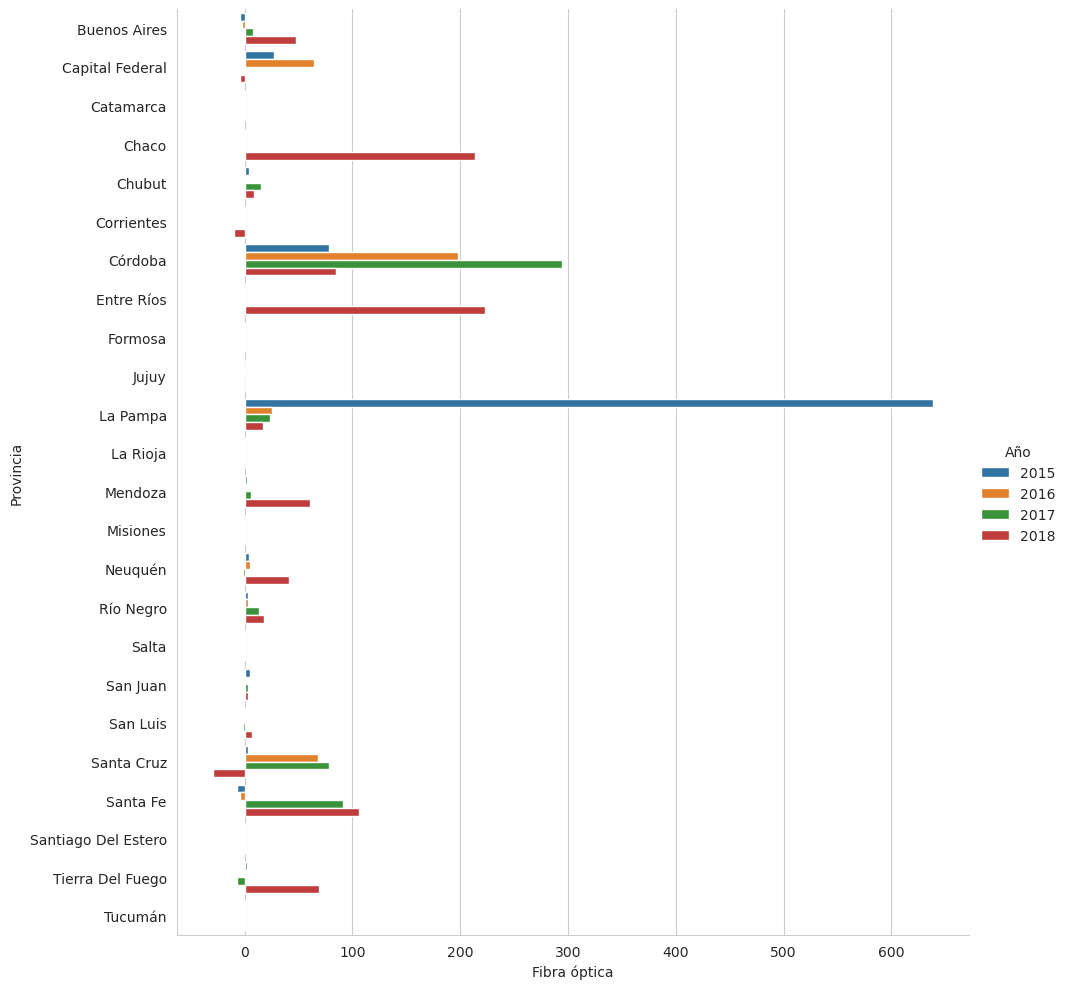

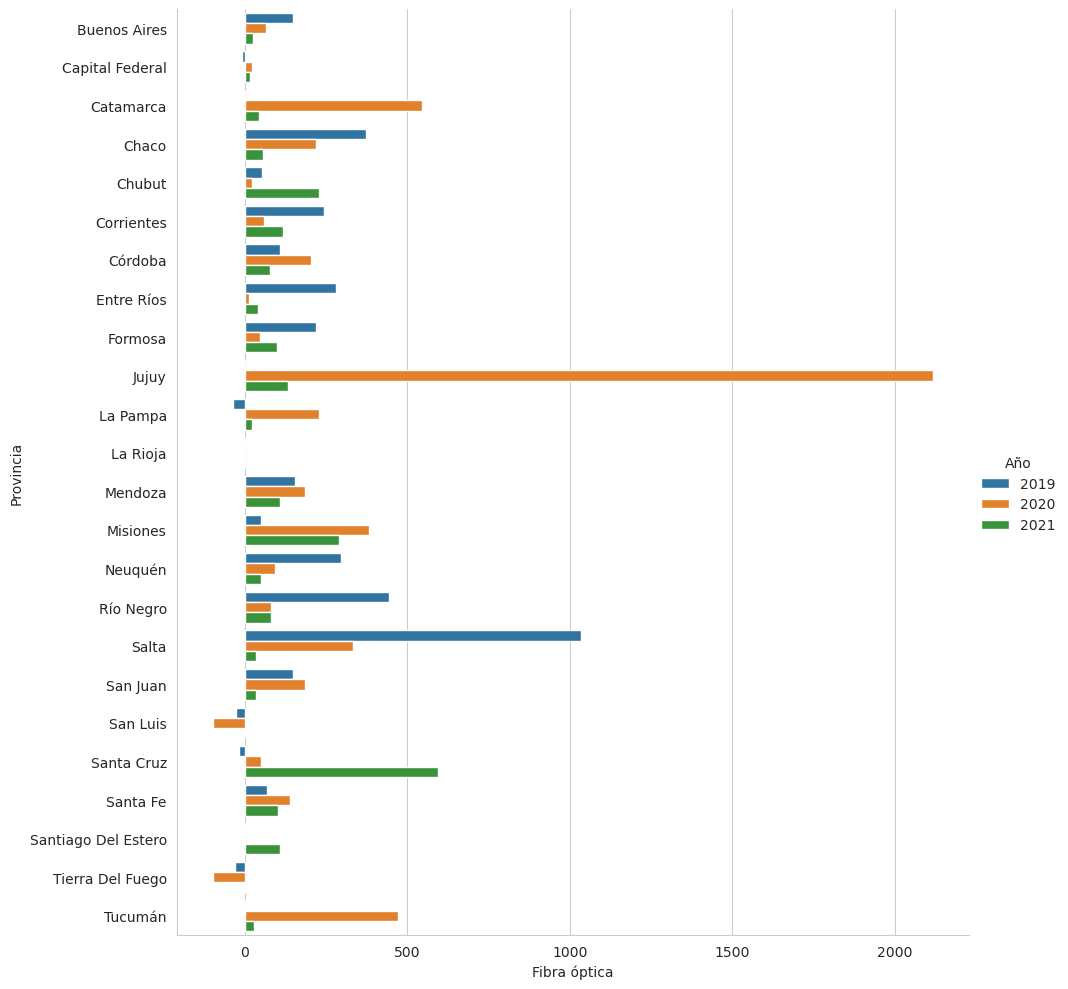

In [24]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'Fibra óptica', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'Fibra óptica', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

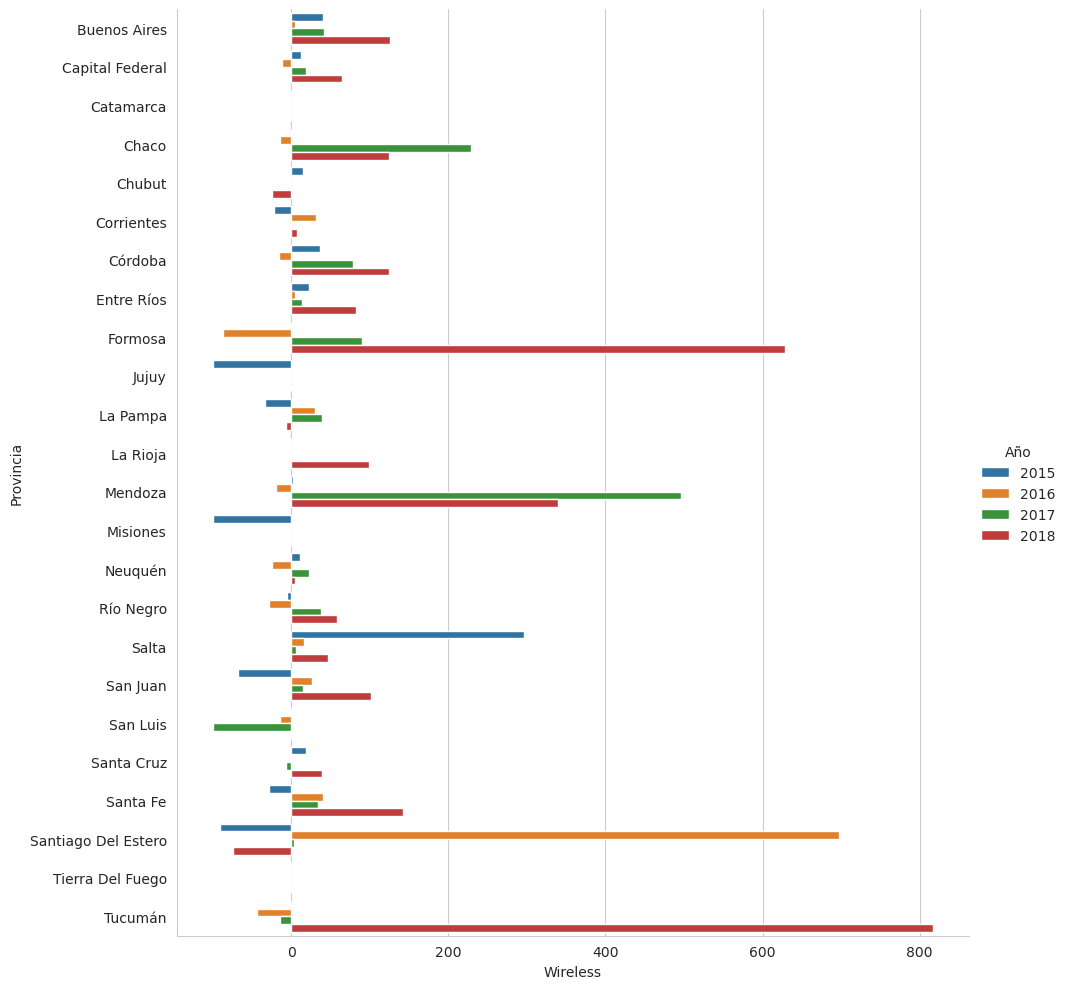

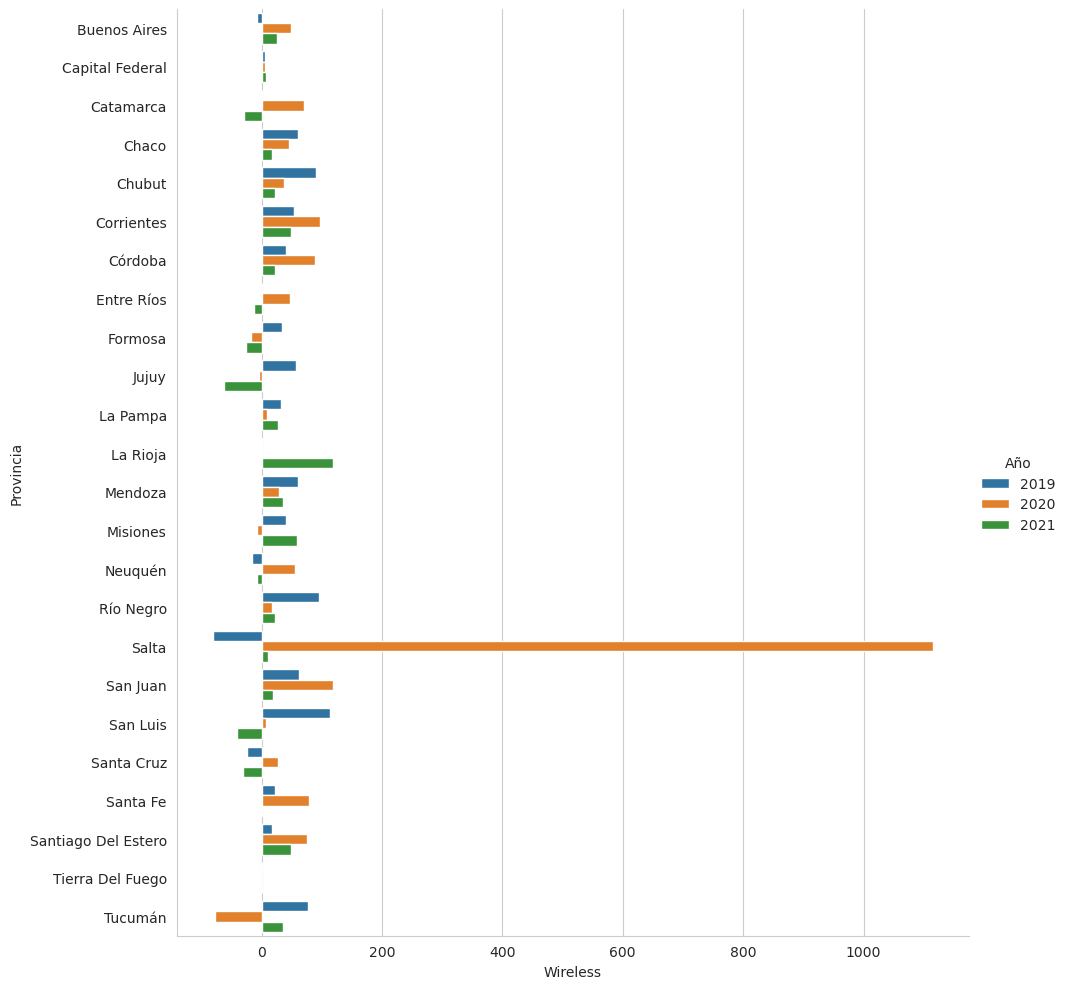

In [25]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'Wireless', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'Wireless', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

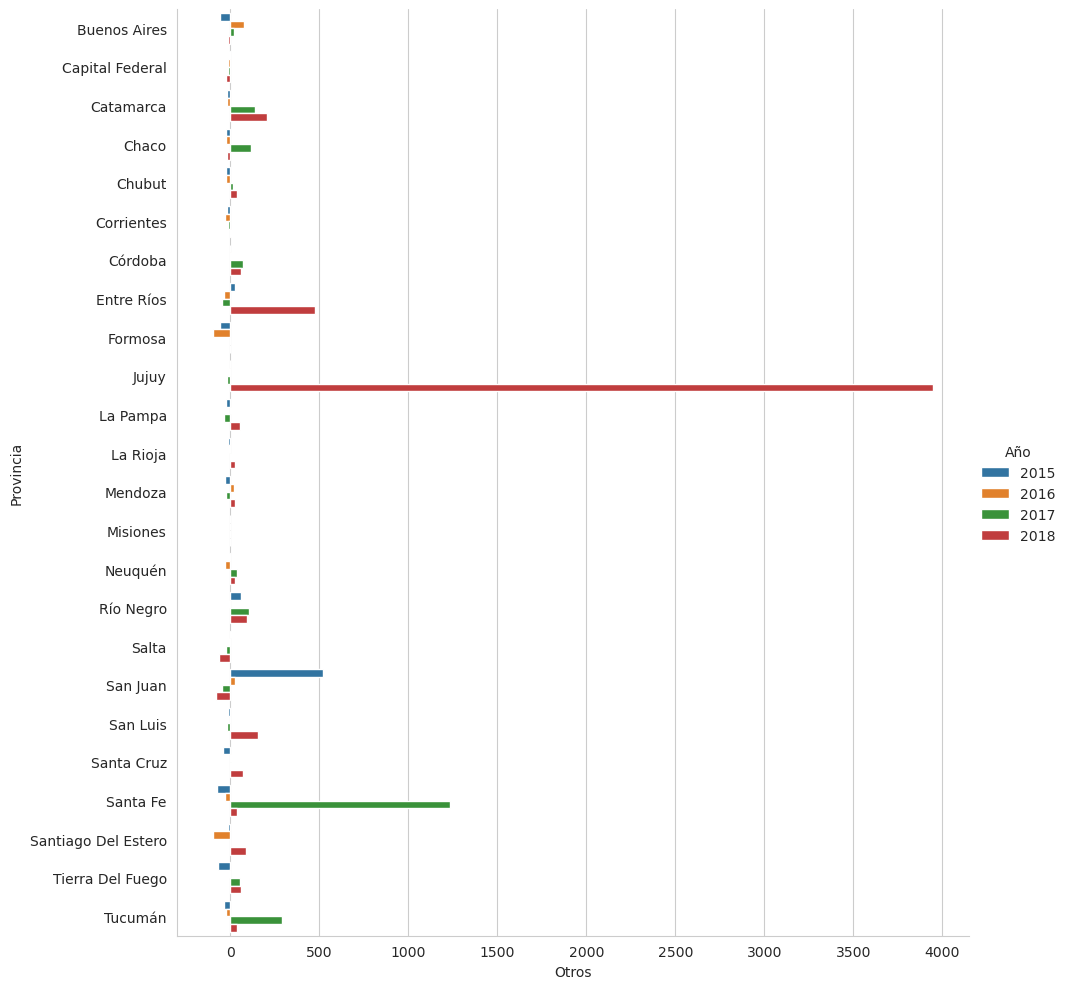

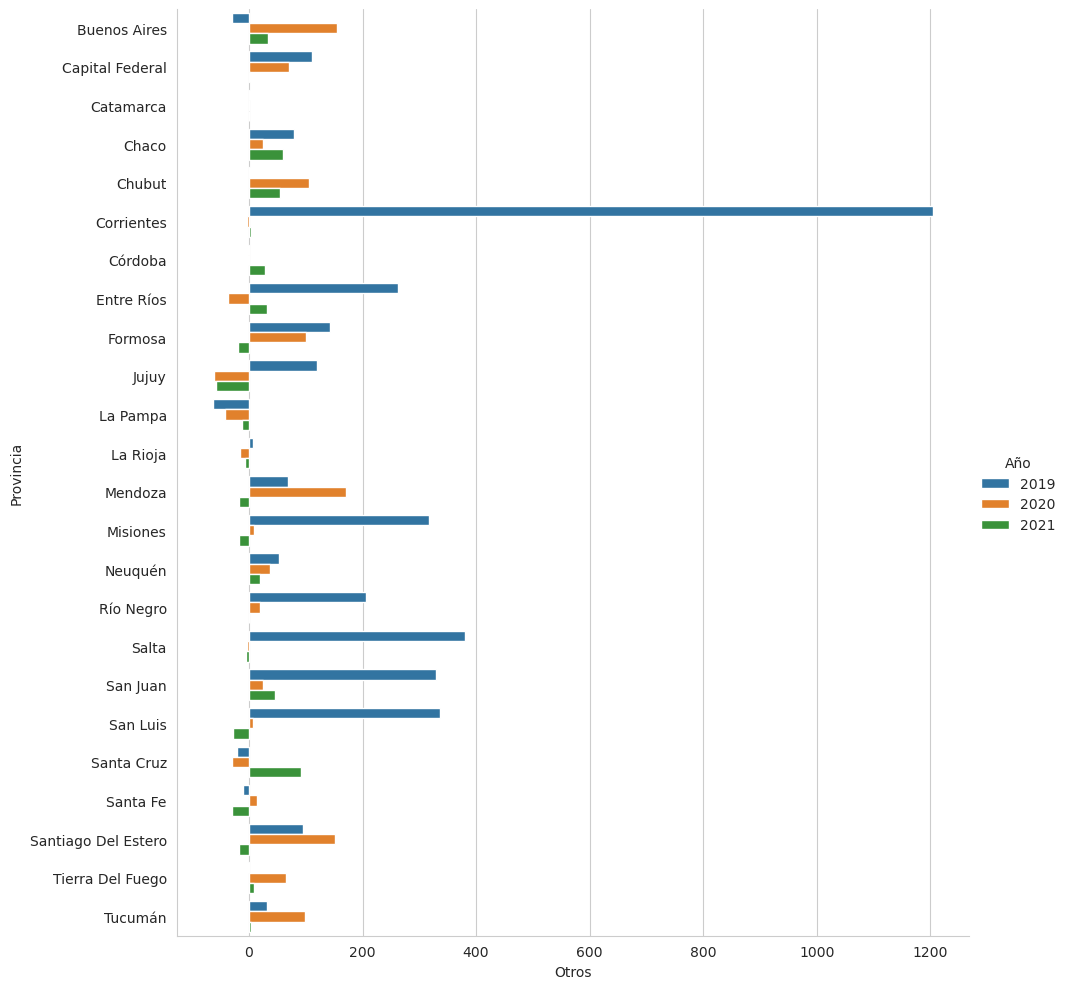

In [26]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'Otros', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'Otros', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

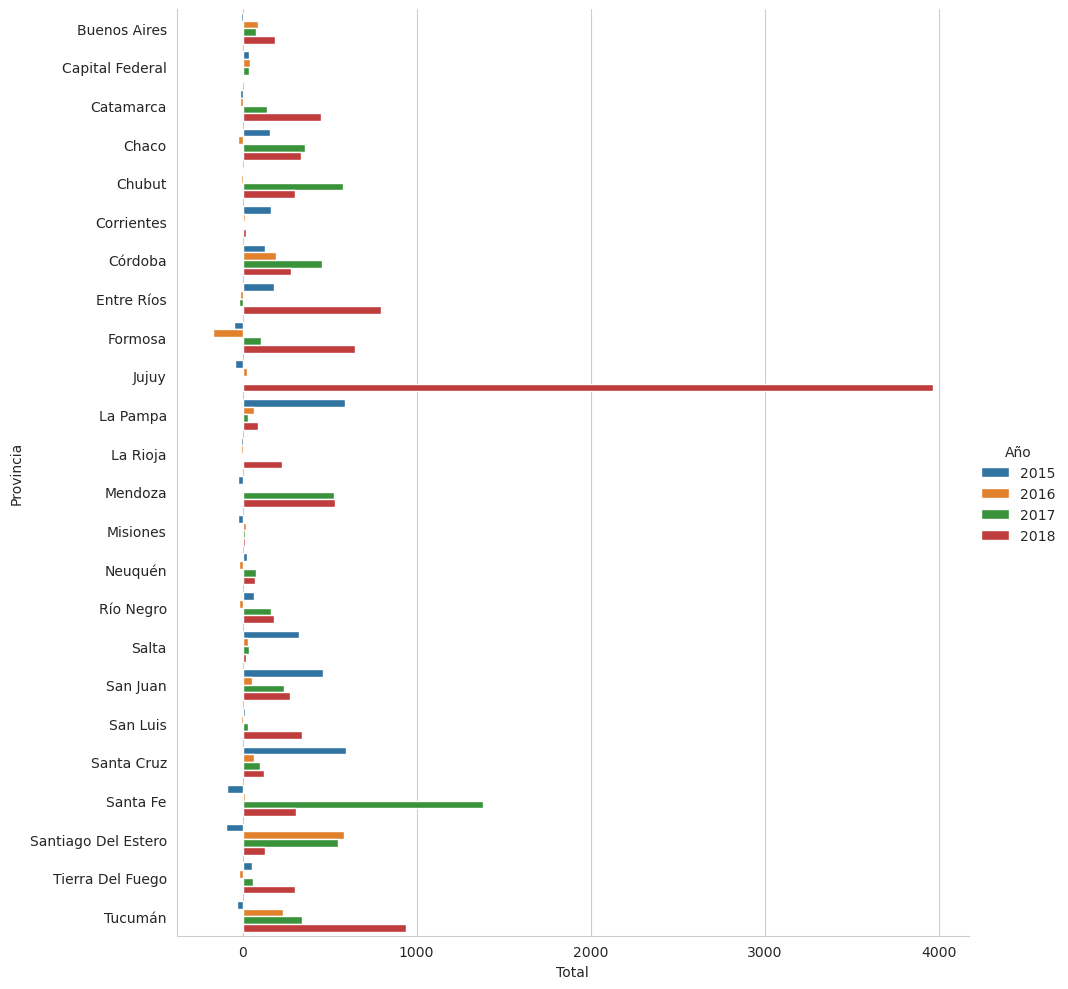

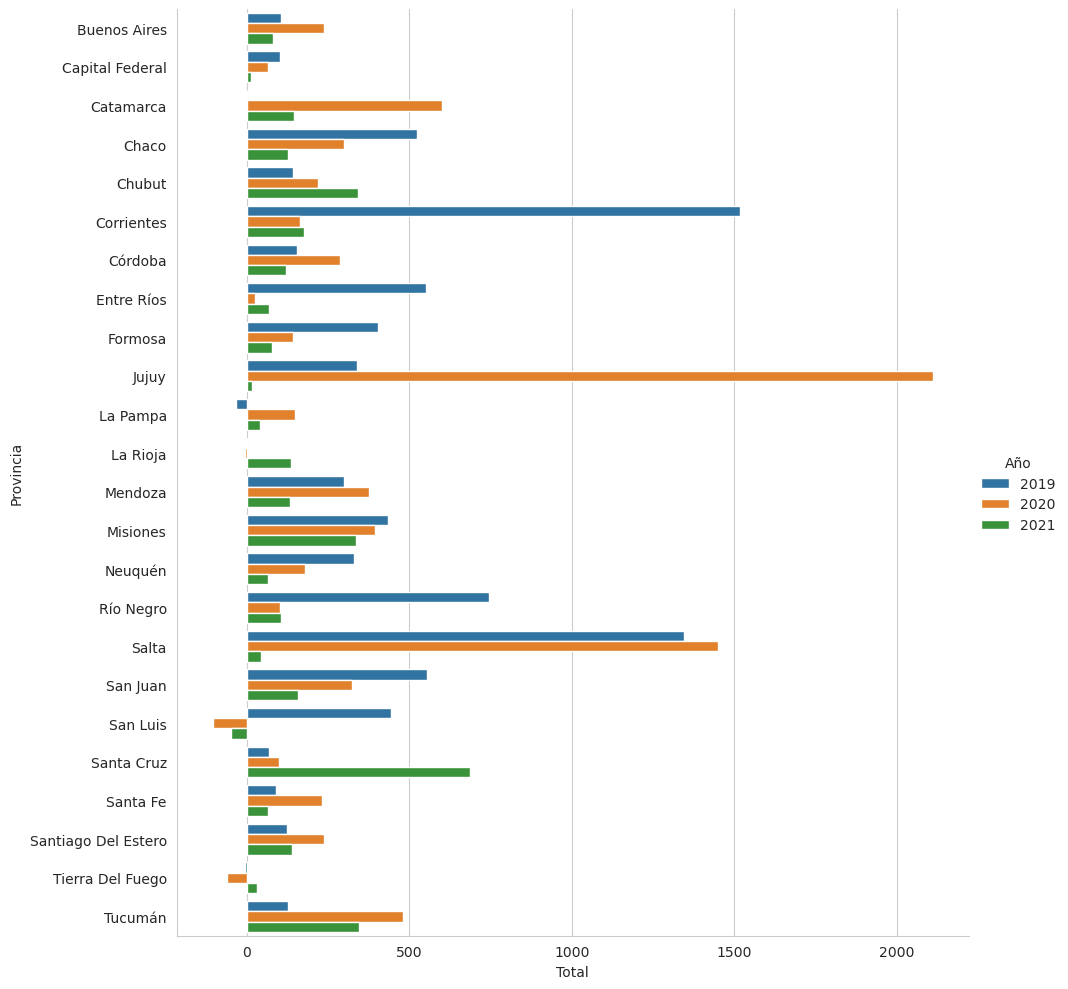

In [27]:
sns.set_style("whitegrid")
sns.catplot(data= grafico_15_18, x= 'Total', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)
sns.catplot(data= grafico_19_21, x= 'Total', y= 'Provincia', kind= 'bar',  hue= 'Año', ci= 0, height= 10)

# Conexiones por Hogares y personas ENACOM

In [28]:
internet_hogar = pd.read_csv("./ENACOM_data/internet_fijo_hogar.csv")
internet_poblacion = pd.read_csv("./ENACOM_data/internet_fijo_poblacion.csv")

if internet_hogar.columns[0] == 'Unnamed: 0':
    internet_hogar.drop(columns= 'Unnamed: 0', inplace= True)

if internet_poblacion.columns[0] == 'Unnamed: 0':
    internet_poblacion.drop(columns= 'Unnamed: 0', inplace= True)

In [29]:
internet_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,3,Buenos Aires,26
1,2022,3,Capital Federal,50
2,2022,3,Catamarca,17
3,2022,3,Chaco,12
4,2022,3,Chubut,26


In [30]:
internet_poblacion.drop(columns= 'Trimestre', inplace= True)

In [31]:
internet_poblacion.shape

(840, 3)

In [32]:
# internet_poblacion['Año'] = internet_poblacion['Año'].astype(str)
internet_poblacion = internet_poblacion.groupby(['Año', 'Provincia']).sum()
internet_poblacion

Accesos por cada 100 hab
Año  Provincia                                    
2014 Buenos Aires                               68
     Capital Federal                           173
     Catamarca                                  24
     Chaco                                      24
     Chubut                                     50
...                                            ...
2022 Santa Cruz                                 39
     Santa Fe                                   73
     Santiago Del Estero                        36
     Tierra Del Fuego                           89
     Tucumán                                    44

[216 rows x 1 columns]

In [33]:
internet_poblacion.reset_index(inplace= True)

In [34]:
internet_poblacion.head()

,Año,Provincia,Accesos por cada 100 hab
0,2014,Buenos Aires,68
1,2014,Capital Federal,173
2,2014,Catamarca,24
3,2014,Chaco,24
4,2014,Chubut,50


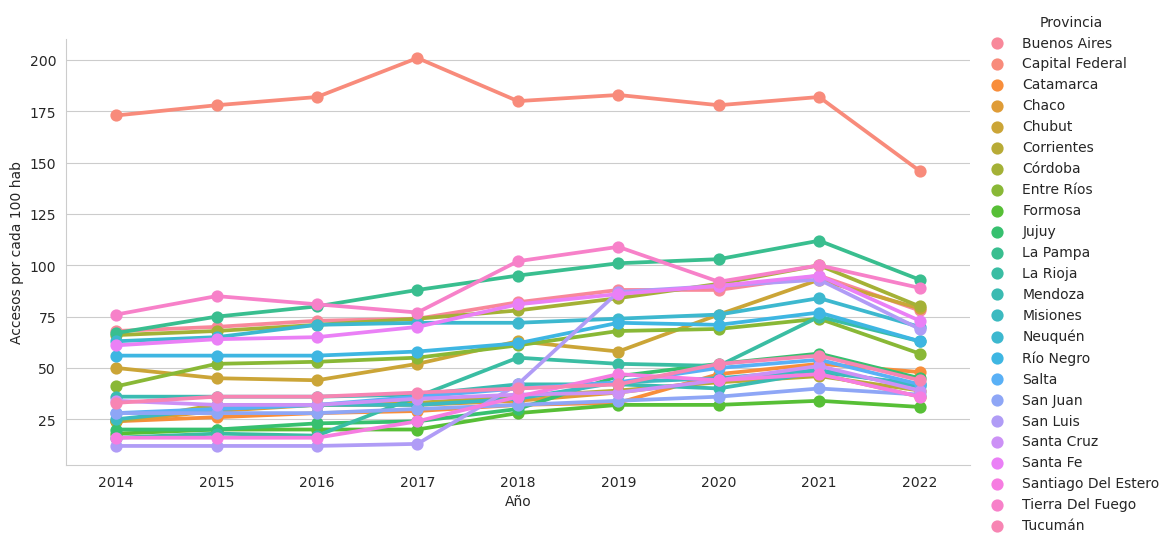

In [35]:
sns.set_style("whitegrid")
sns.catplot(x= 'Año', y= 'Accesos por cada 100 hab', data= internet_poblacion, kind= "point", hue= 'Provincia', aspect= 2)

In [36]:
internet_hogar.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [37]:
internet_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [38]:
internet_hogar['Accesos por cada 100 hogares'] = internet_hogar['Accesos por cada 100 hogares'].str.replace("," , ".")

In [39]:
internet_hogar['Accesos por cada 100 hogares'] = internet_hogar['Accesos por cada 100 hogares'].astype(float)

In [40]:
internet_hogar.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [41]:
internet_hogar.drop(columns= 'Trimestre', inplace= True)

In [42]:
internet_hogar = internet_hogar.groupby(['Año', 'Provincia']).sum()
internet_hogar

Accesos por cada 100 hogares
Año  Provincia                                        
2014 Buenos Aires                               222.47
     Capital Federal                            454.09
     Catamarca                                   99.17
     Chaco                                       84.66
     Chubut                                     163.50
...                                                ...
2022 Santa Cruz                                 129.68
     Santa Fe                                   233.75
     Santiago Del Estero                        142.85
     Tierra Del Fuego                           297.66
     Tucumán                                    177.84

[216 rows x 1 columns]

In [43]:
internet_hogar.reset_index(inplace= True)
internet_hogar.head()

,Año,Provincia,Accesos por cada 100 hogares
0,2014,Buenos Aires,222.47
1,2014,Capital Federal,454.09
2,2014,Catamarca,99.17
3,2014,Chaco,84.66
4,2014,Chubut,163.50


# Rango de velocidades

In [96]:
internet_rango_vel_prov = pd.read_csv("./ENACOM_data/internet_rango_vel_prov.csv")

if internet_rango_vel_prov.columns[0] == 'Unnamed: 0':
    internet_rango_vel_prov.drop(columns= 'Unnamed: 0', inplace= True)

In [97]:
internet_rango_vel_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [98]:
internet_rango_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [99]:
internet_rango_vel_prov[internet_rango_vel_prov.isnull().any(axis= 1)]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
313,2019,2,Capital Federal,74.0,1.027,281.370,124.087,239.691,296.155,475.991,NaN,1.418.395
323,2019,2,La Rioja,9.0,11.000,39.819,4.297,4.857,13.000,1.298,NaN,50.304
324,2019,2,Mendoza,20.0,2.522,205.165,2.971,10.092,1.256,234,NaN,222.260
331,2019,2,Santa Cruz,25.0,84.000,24.861,3.806,1.202,28.000,4,NaN,30.010
334,2019,2,Tierra Del Fuego,6.0,123.000,41.824,4.241,1.573,96.000,32,NaN,47.895
335,2019,2,Tucumán,16.0,157.000,78.891,44.296,24.291,628.000,18.394,NaN,166.673


In [100]:
internet_rango_vel_prov['OTROS'].fillna(0, inplace= True)

In [101]:
columnas_numerica = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
                     '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                     '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                     '+ 30 Mbps', 'OTROS']

for columna in columnas_numerica:
    internet_rango_vel_prov[columna] = internet_rango_vel_prov[columna].astype(str)
    internet_rango_vel_prov[columna] = internet_rango_vel_prov[columna].str.replace('.', '')
    internet_rango_vel_prov[columna] = internet_rango_vel_prov[columna].astype(int)

# internet_rango_vel_prov['Año'] = internet_rango_vel_prov['Año'].astype(str)
# internet_rango_vel_prov['Trimestre'] = internet_rango_vel_prov['Trimestre'].astype(str)
internet_rango_vel_prov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    int64 
 1   Trimestre            840 non-null    int64 
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    int64 
 4   + 512 Kbps - 1 Mbps  840 non-null    int64 
 5   + 1 Mbps - 6 Mbps    840 non-null    int64 
 6   + 6 Mbps - 10 Mbps   840 non-null    int64 
 7   + 10 Mbps - 20 Mbps  840 non-null    int64 
 8   + 20 Mbps - 30 Mbps  840 non-null    int64 
 9   + 30 Mbps            840 non-null    int64 
 10  OTROS                840 non-null    int64 
 11  Total                840 non-null    object
dtypes: int64(10), object(2)
memory usage: 78.9+ KB


In [102]:
internet_rango_bajo = internet_rango_vel_prov[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                                               '+ 6 Mbps - 10 Mbps']]
internet_rango_medio = internet_rango_vel_prov[['+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps']]
internet_rango_alto = internet_rango_vel_prov[['+ 30 Mbps', 'OTROS']]


In [103]:
#df['Valor Medio'] = df[['Columna1', 'Columna2', 'Columna3']].apply(lambda row: row.mean(), axis=1)
internet_rango_vel_prov['Valor medio hasta 10M'] = internet_rango_bajo.apply(lambda fila: fila.mean(), axis= 1)
internet_rango_vel_prov['Valor medio 10M a 30M'] = internet_rango_medio.apply(lambda fila: fila.mean(), axis= 1)
internet_rango_vel_prov['Valor medio mas de 30M'] = internet_rango_alto.apply(lambda fila: fila.mean(), axis= 1)

In [104]:
internet_rango_vel_prov.drop(columns= 'Total', inplace= True)

In [105]:
internet_rango_vel_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Valor medio hasta 10M,Valor medio 10M a 30M,Valor medio mas de 30M
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,161481.00,139731.5,1842255.0
1,2022,3,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477,28278.00,40319.0,679291.0
2,2022,3,Catamarca,710,3840,3107,5389,5099,3737,50298,2208,3261.50,4418.0,26253.0
3,2022,3,Chaco,4610,9870,16782,18938,8049,15828,79390,3711,12550.00,11938.5,41550.5
4,2022,3,Chubut,1090,1444,45707,3094,34682,15309,17563,20024,12833.75,24995.5,18793.5


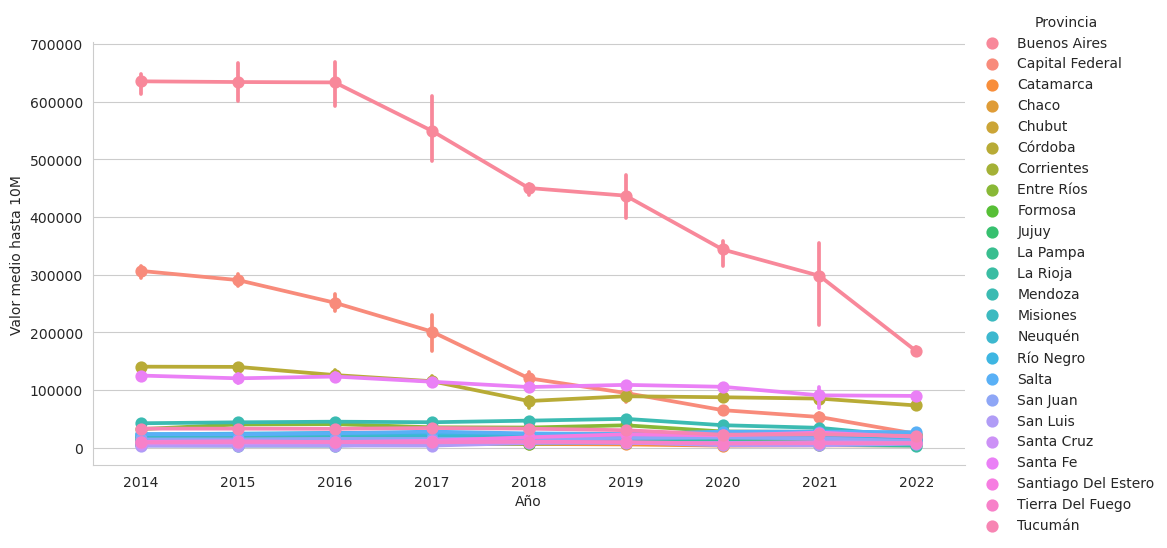

In [106]:
sns.set_style("whitegrid")
sns.catplot(x= 'Año', y= 'Valor medio hasta 10M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)

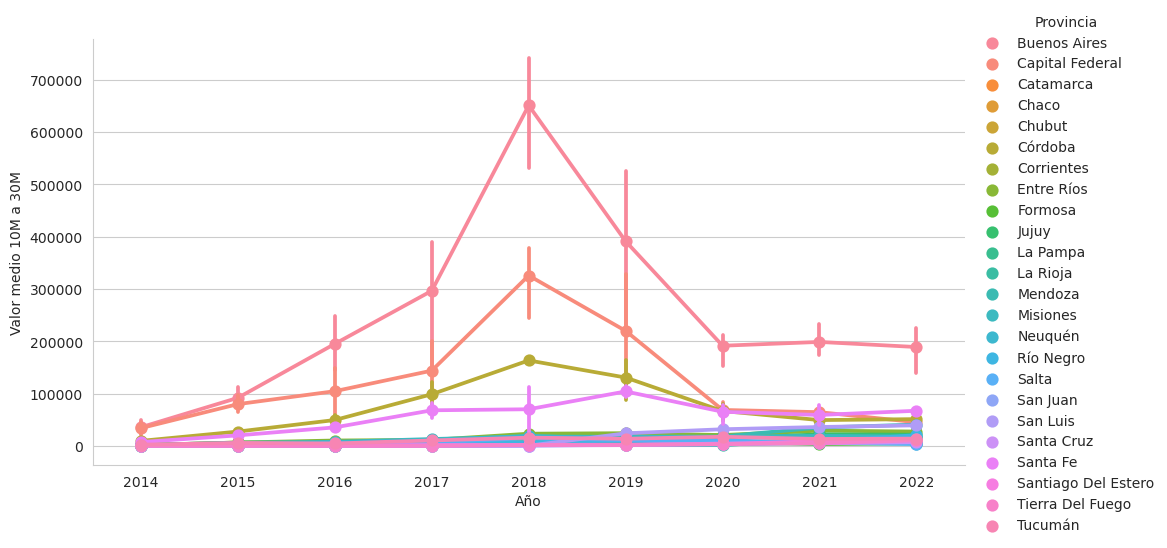

In [107]:
sns.set_style("whitegrid")
sns.catplot(x= 'Año', y= 'Valor medio 10M a 30M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)

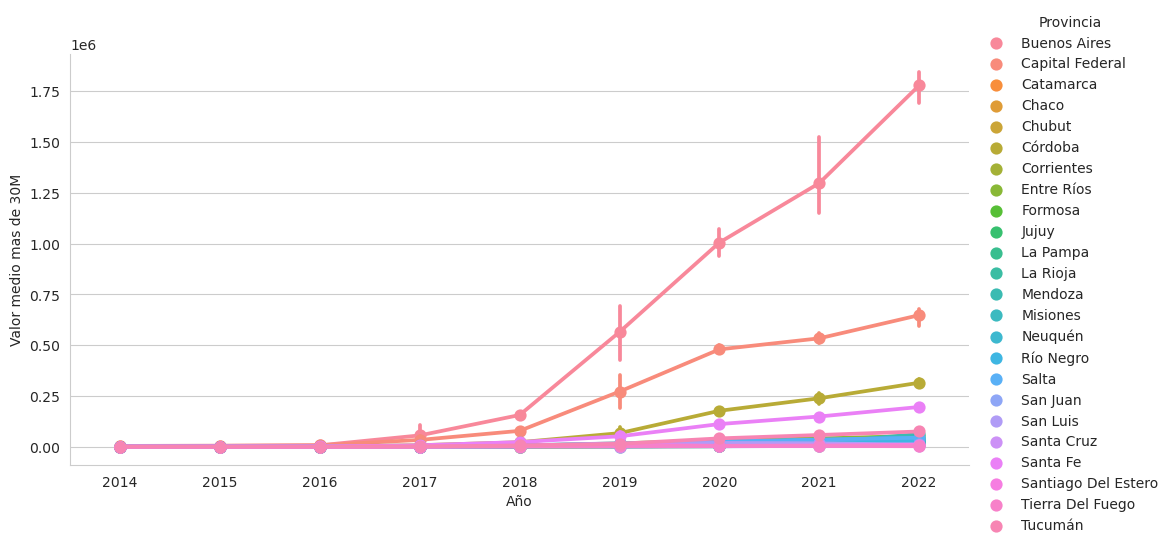

In [110]:
sns.set_style("whitegrid")
sns.catplot(x= 'Año', y= 'Valor medio mas de 30M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)

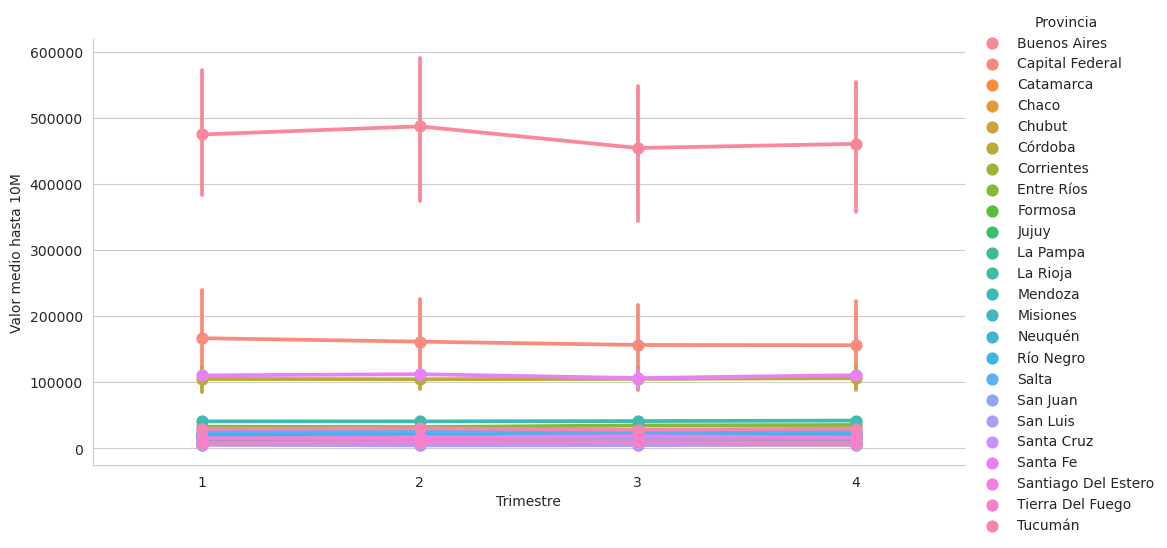

In [111]:
sns.set_style("whitegrid")
sns.catplot(x= 'Trimestre', y= 'Valor medio hasta 10M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)

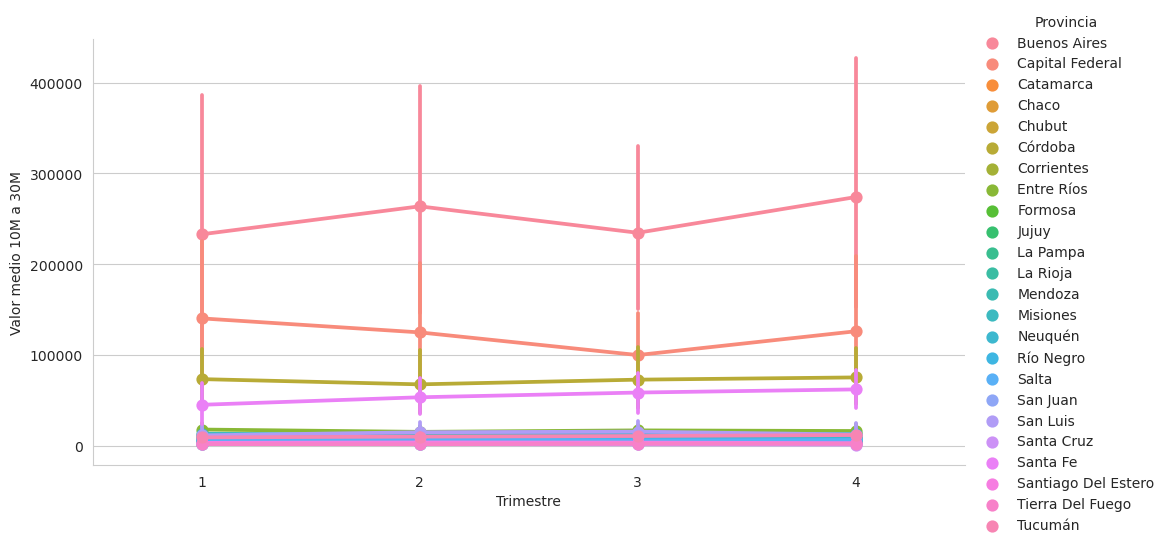

In [112]:
sns.set_style("whitegrid")
sns.catplot(x= 'Trimestre', y= 'Valor medio 10M a 30M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)

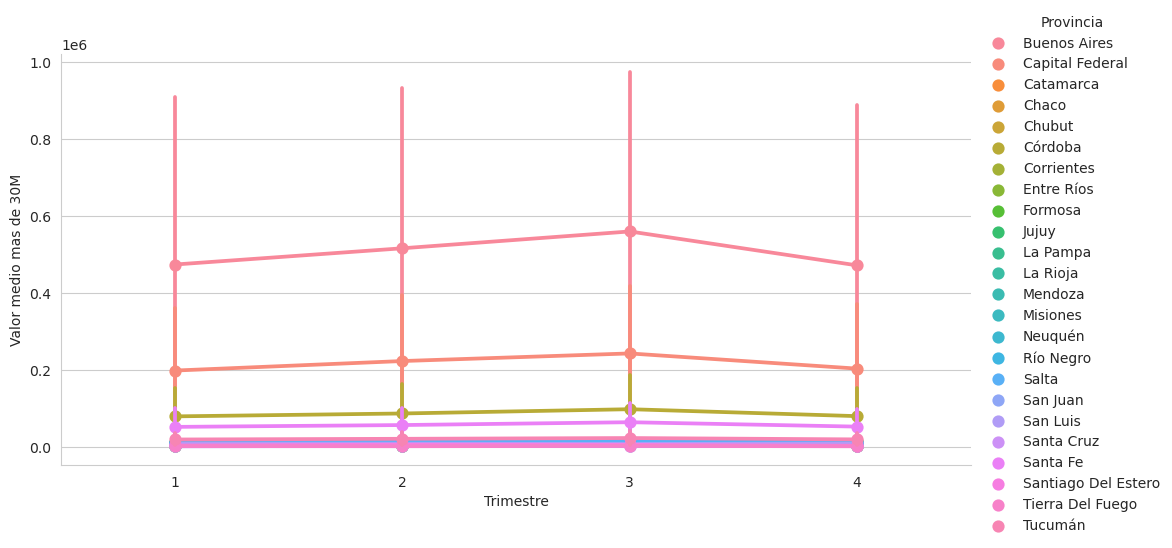

In [113]:
sns.set_style("whitegrid")
sns.catplot(x= 'Trimestre', y= 'Valor medio mas de 30M', data= internet_rango_vel_prov, kind= "point", hue= 'Provincia', aspect= 2)